In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
lp2017=pd.read_csv("./input/연령별퇴사/2020.csv")
lp2017

,성별(1),연령별(1),2020,2020.1,2020.2,2020.3,2020.4
0,성별(1),연령별(1),총계,진입자,유지자,이동자,미등록자
1,총계,총계,"24,832","3,967","17,191","3,674","3,493"
2,NaN,15-29세,"3,888","1,246","1,846",796,931
3,NaN,30-39세,"5,100",671,"3,707",722,531
4,NaN,40-49세,"5,853",636,"4,455",763,540
5,NaN,50-59세,"5,693",660,"4,252",781,660
6,NaN,60세 이상,"4,298",754,"2,931",612,831
7,남자,총계,"14,180","1,976","10,022","2,182","1,764"
8,NaN,15-29세,"1,999",675,918,406,486
9,NaN,30-39세,"3,037",349,"2,223",465,259


In [74]:
lp2020 = pd.read_csv("./input/연령별퇴사/2020.csv", skiprows=2)
lp2020 = lp2020.replace({',': ''}, regex=True)

lp2020 = lp2020.iloc[:, 1:-1]

data1 = lp2020.iloc[:5, 2:].astype(int).sum(axis=1)
data2 = lp2020.iloc[:5, -1].astype(int)

ratio2020=[]
for i in range(len(data1)):
    ratio2020.append(data2.iloc[i]/data1.iloc[i]*100)
ratio2020

[20.473251028806587,
 14.156862745098039,
 13.033823026990094,
 13.718601791673985,
 14.24249476378869]

In [75]:
satisfied2020 = pd.read_excel("./input/2020/근로_환경_만족도_2020.xlsx")
satisfied2020.iloc[4:10]
# satisfied2020

,특성별(1),특성별(2),2020,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
4,연령별,15~19세,314,12.5,70.6,12.6,2.4,1.9,3
5,NaN,20~29세,6776,8.7,76,13.4,1.3,0.7,2.9
6,NaN,30~39세,9843,9.4,77.3,12,0.9,0.3,3
7,NaN,40~49세,11817,7.7,75.7,15,1.1,0.5,2.9
8,NaN,50~59세,11882,5.7,73.9,18.1,1.6,0.7,2.8
9,NaN,60세 이상,9906,5.4,72.8,20,1.5,0.3,2.8


In [76]:
satisfied2020 = pd.read_excel("./input/2020/근로_환경_만족도_2020.xlsx")
total_list = satisfied2020.iloc[4:6, 2]
sum_data = satisfied2020.iloc[4:6, 5:7].sum(axis=1)
list1 = list(sum_data)
list2 = list(total_list)
list1
total_l = []
for i in range(len(list1)):
    total_l.append(int((list1[i]*list2[i])/100+0.5))
total_l
total = sum(total_l)
total
ratio15_29 = total/sum(list2)*100
ratio15_29

list_satisfied = [ratio15_29]
sum_data2 = satisfied2020.iloc[6:10, 5:7].sum(axis=1)
for i in range(len(sum_data2)):
    list_satisfied.append(sum_data2.iloc[i])

list_satisfied

[14.710860366713682, 12.9, 16.1, 19.700000000000003, 21.5]

In [77]:
df = pd.DataFrame({"불만족": list_satisfied, "퇴사율": ratio2020})

X = df["불만족"]
y = df["퇴사율"]

correlation_not_reasonable_concede=X.corr(y)

# print(mean)
# print(df)
print(f"불만족과 퇴사율의 상관관계 : {correlation_not_reasonable_concede}")
df

불만족과 퇴사율의 상관관계 : -0.3293776488899748


,불만족,퇴사율
0,14.71086,20.473251
1,12.90000,14.156863
2,16.10000,13.033823
3,19.70000,13.718602
4,21.50000,14.242495


In [78]:
wlb = pd.read_excel("./input/2020/업무_외_활동_참여_빈도_2020.xlsx")
wlb.iloc[5:11,1:]

,특성별(2),2020,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
5,15~19세,314,0.2,0,1,0,13.9,84.9,0,314,...,21.6,34,0,314,0,0.7,1.7,8.7,88.9,0
6,20~29세,6776,2.8,0.7,0.4,0.8,21.9,73.4,0.2,6776,...,26,25.8,0.2,6776,0,0.3,1.5,10.8,87.1,0.3
7,30~39세,9843,31.9,10.5,3.3,3.1,13.7,37.4,0.1,9843,...,26.1,28.6,0.2,9843,0.1,0.5,1.8,11.1,86,0.5
8,40~49세,11817,30.9,15.4,6,7.4,16.8,23.4,0.1,11817,...,28.4,31,0.1,11817,0.1,0.6,1.6,11.6,85.8,0.3
9,50~59세,11882,5.1,5.2,3.4,6.6,33.8,46,0.1,11882,...,26.4,34.6,0.1,11882,0.1,0.6,2.5,12.1,84.5,0.2
10,60세 이상,9906,1.8,2,1.2,3.4,35.8,55.7,0.1,9906,...,24.1,45.4,0.2,9906,0,0.5,1.5,8.5,89.3,0.2


In [79]:
wlb = pd.read_excel("./input/2020/업무_외_활동_참여_빈도_2020.xlsx")
wlb = wlb.iloc[5:11, 2:5]
list1529 = wlb.iloc[:, 0]

wlb_edu15_total = list1529.iloc[0]
wlb_edu15_total
wlb_edu15_1 = wlb.iloc[0, 1]
wlb_edu15_2 = wlb.iloc[0, 2]
print(wlb_edu15_total, wlb_edu15_1, wlb_edu15_2)

wlb_edu20_total = list1529.iloc[1]
wlb_edu20_1 = wlb.iloc[1, 1]
wlb_edu20_2 = wlb.iloc[1, 2]
print(wlb_edu20_total, wlb_edu20_1, wlb_edu20_2)

wlb_edu_15_29 = (wlb_edu15_1*wlb_edu15_total+wlb_edu15_2*wlb_edu15_total+wlb_edu20_1 *
                 wlb_edu20_total+wlb_edu20_2*wlb_edu15_total)/(wlb_edu15_total+wlb_edu20_total)

list_edu=[wlb_edu_15_29]
data=wlb.iloc[2:,1:].sum(axis=1)
data

for i in range(len(data)):
  list_edu.append(data.iloc[i])

list_edu

314 0.2 0
6776 2.8 0.7


[2.7158533145275032, 42.4, 46.3, 10.3, 3.8]

In [80]:
wlb = pd.read_excel("./input/2020/업무_외_활동_참여_빈도_2020.xlsx")
wlb = wlb.iloc[5:11, 18:21]
list1529 = wlb.iloc[:, 0]
list1529
wlb_cook15_total = list1529.iloc[0]
wlb_cook15_1 = wlb.iloc[0, 1]
wlb_cook15_2 = wlb.iloc[0, 2]
print(wlb_cook15_total, wlb_cook15_1, wlb_cook15_2)

wlb_cook20_total = list1529.iloc[1]
wwlb_cook20_1 = wlb.iloc[1, 1]
wlb_cook20_2 = wlb.iloc[1, 2]
print(wlb_cook20_total, wwlb_cook20_1, wlb_cook20_2)

wlb_cook_15_29 = (wlb_cook15_1*wlb_cook15_total+wlb_cook15_2*wlb_cook15_total+wwlb_cook20_1 *
                 wlb_cook20_total+wlb_cook20_2*wlb_cook20_total)/(wlb_cook15_total+wlb_cook20_total)

list_cook=[wlb_cook_15_29]
data=wlb.iloc[2:,1:].sum(axis=1)
data

for i in range(len(data)):
  list_cook.append(data.iloc[i])

list_cook


314 8.1 14.1
6776 16.8 19.6


[35.77111424541608, 55.8, 60.2, 57.599999999999994, 56.8]

In [81]:
wlb = pd.read_excel("./input/2020/업무_외_활동_참여_빈도_2020.xlsx")
wlb = wlb.iloc[5:11, 25:31]
list1529 = wlb.iloc[:, 0]
list1529
wlb_workout15_total = list1529.iloc[0]
wlb_workout15_1 = wlb.iloc[0, -1]
wlb_workout15_2 = wlb.iloc[0, -2]
print(wlb_workout15_total, wlb_workout15_1, wlb_workout15_2)

wlb_workout20_total = list1529.iloc[1]
wlb_workout20_1 = wlb.iloc[1, -1]
wlb_workout20_2 = wlb.iloc[1, -2]
print(wlb_workout20_total, wlb_workout20_1, wlb_workout20_2)

wlb_cook_15_29 = (wlb_workout15_1*wlb_workout15_total+wlb_workout15_2*wlb_workout15_total+wlb_workout20_1 *
                 wlb_workout20_total+wlb_workout20_2*wlb_workout20_total)/(wlb_workout15_total+wlb_workout20_total)

list_workout=[wlb_cook_15_29]
data=wlb.iloc[2:,-2:].sum(axis=1)
data

for i in range(len(data)):
  list_workout.append(data.iloc[i])

list_workout


314 34 21.6
6776 25.8 26


[51.96829337094499, 54.7, 59.4, 61.0, 69.5]

In [82]:
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

# df = pd.DataFrame(
#     {"2020퇴사율": ratio2020, "근로환경불만족": list_satisfied, "요리": list_cook, "자녀양육": list_edu, "운동": list_workout})
# corr_matrix = df.corr()
# corr_matrix

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('상관관계 분석')
# plt.show()

# print(df.describe())

     2020퇴사율  근로환경불만족  요리/집안일  자녀양육    운동
1  14.156863     12.9    55.8  42.4  54.7
2  13.033823     16.1    60.2  46.3  59.4
3  13.718602     19.7    57.6  10.3  61.0
4  14.242495     21.5    56.8   3.8  69.5


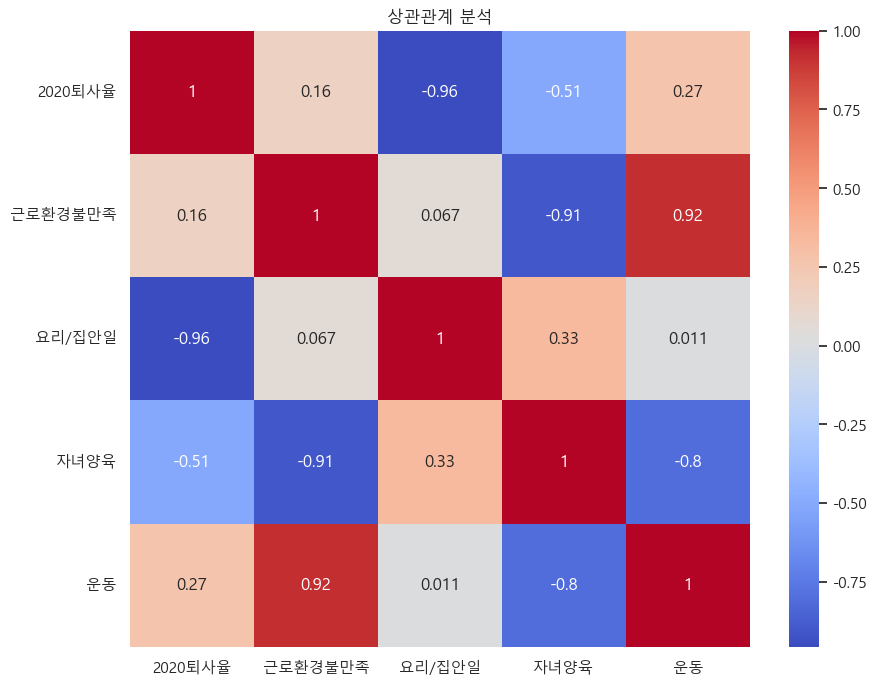

         2020퇴사율    근로환경불만족     요리/집안일       자녀양육         운동
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   15.125007  16.982172  53.234223  21.103171  59.313659
std     3.027824   3.549598   9.897477  21.462973   6.742644
min    13.033823  12.900000  35.771114   2.715853  51.968293
25%    13.718602  14.710860  55.800000   3.800000  54.700000
50%    14.156863  16.100000  56.800000  10.300000  59.400000
75%    14.242495  19.700000  57.600000  42.400000  61.000000
max    20.473251  21.500000  60.200000  46.300000  69.500000


In [92]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

df = pd.DataFrame(
    {"2020퇴사율": ratio2020, "근로환경불만족": list_satisfied, "요리/집안일": list_cook, "자녀양육": list_edu, "운동": list_workout})

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# IQR 범위를 벗어난 이상치 제거
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(filtered_df)

corr_matrix = filtered_df.corr()
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.yticks(rotation=0)
plt.title('상관관계 분석')
plt.show()

print(df.describe())

In [84]:
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

# df = pd.DataFrame(
#     {"2020퇴사율": ratio2020, "근로환경불만족": list_satisfied, "요리": list_cook, "자녀양육": list_edu, "운동": list_workout})

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # IQR 범위를 벗어난 이상치 제거
# filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df)

# corr_matrix = filtered_df.corr()
# corr_matrix

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('상관관계 분석')
# plt.show()

# print(df.describe())

In [85]:
# import matplotlib.pyplot as plt

# plt.boxplot(df['2020퇴사율'])
# plt.show()

In [93]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(filtered_df)
# plt.show()


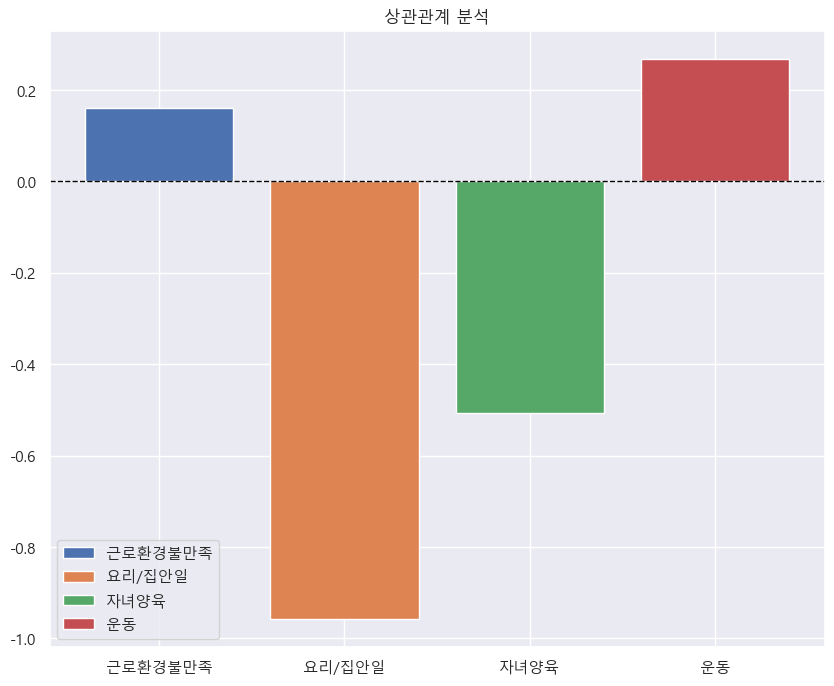

In [90]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

df1 = pd.DataFrame(
    {"2020퇴사율": ratio2020, "근로환경불만족": list_satisfied})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df1 = df1[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df1)

df2 = pd.DataFrame(
    {"2020퇴사율": ratio2020, "요리/집안일": list_cook})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df2 = df2[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df2)

df3 = pd.DataFrame(
    {"2020퇴사율": ratio2020, "자녀양육": list_edu})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df3 = df3[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df3)

df4 = pd.DataFrame(
    {"2020퇴사율": ratio2020, "운동": list_workout})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df4 = df4[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df4)

corr_matrix1 = filtered_df1.corr()
corr_matrix2 = filtered_df2.corr()
corr_matrix3 = filtered_df3.corr()
corr_matrix4 = filtered_df4.corr()


corr1 = corr_matrix1.iloc[0, 1]
corr2 = corr_matrix2.iloc[0, 1]
corr3 = corr_matrix3.iloc[0, 1]
corr4 = corr_matrix4.iloc[0, 1]


plt.figure(figsize=(10, 8))
bar1 = plt.bar("근로환경불만족", corr1, label="근로환경불만족")
bar2 = plt.bar("요리/집안일", corr2, label="요리/집안일")
bar3 = plt.bar("자녀양육", corr3, label="자녀양육")
bar4 = plt.bar("운동", corr4, label="운동")

plt.legend()
plt.axhline(0.0, color='black', linestyle='--', linewidth=1)
plt.title('상관관계 분석')
plt.show()

# print(filtered_df1.describe())
# print(filtered_df2.describe())
# print(filtered_df3.describe())
# print(filtered_df4.describe())